#### import libraries

In [2]:
#%pip install seaborn
#%pip install pandas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts the plot size

In [3]:
# Read the data from csv
df = pd.read_csv('/Users/nasalaha/Desktop/Python/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Explore the date there is any missing (null) values 
null_df = df.isnull()
print(null_df) # True indicates the cell is null 

       name  rating  genre   year  released  score  votes  director  writer  \
0     False   False  False  False     False  False  False     False   False   
1     False   False  False  False     False  False  False     False   False   
2     False   False  False  False     False  False  False     False   False   
3     False   False  False  False     False  False  False     False   False   
4     False   False  False  False     False  False  False     False   False   
...     ...     ...    ...    ...       ...    ...    ...       ...     ...   
7663  False    True  False  False     False  False  False     False   False   
7664  False    True  False  False     False  False  False     False   False   
7665  False    True  False  False     False  False  False     False   False   
7666  False    True  False  False     False   True   True     False   False   
7667  False    True  False  False     False  False  False     False   False   

       star  country  budget  gross  company  runti

In [5]:
df.info() #checking for the total entries, null values, and dtypes of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# 2nd method - Explore the date there is any missing values and 0.00 indicates no null values in the row
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}'.format(col, pct_missing))

name-0.0
rating-0.010041731872717789
genre-0.0
year-0.0
released-0.0002608242044861763
score-0.0003912363067292645
votes-0.0003912363067292645
director-0.0
writer-0.0003912363067292645
star-0.00013041210224308815
country-0.0003912363067292645
budget-0.2831246739697444
gross-0.02464788732394366
company-0.002217005738132499
runtime-0.0005216484089723526


In [7]:
# Delete the rows with null vlaues in respective columns
df.dropna(subset=['budget','gross','company'], inplace=True)

In [8]:
# Checking for any missing values after deleting null value rows in respective columns
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}'.format(col, pct_missing))

name-0.0
rating-0.002208317997791682
genre-0.0
year-0.0
released-0.0
score-0.0
votes-0.0
director-0.0
writer-0.0
star-0.0
country-0.0001840264998159735
budget-0.0
gross-0.0
company-0.0
runtime-0.0001840264998159735


In [9]:
df.dtypes #check for data types

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
# Change the data type using dictionary method
convert_dict = {'budget': 'int64',
                'gross': 'int64',
        
                'votes':'int64'
               }
df = df.astype(convert_dict)
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [12]:
df['released'] = df['released'].astype('string')

In [13]:
df.drop('released',axis=1,inplace=True)
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [14]:
#soritng the date based on gross 
df = df.sort_values(by=['gross'],inplace=False,ascending=False)

In [15]:
pd.set_option('display.max_rows',20)

In [16]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0
2417,Madadayo,NaN,Drama,1993,7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [17]:
# Checking for unique values 
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1481, dtype: object

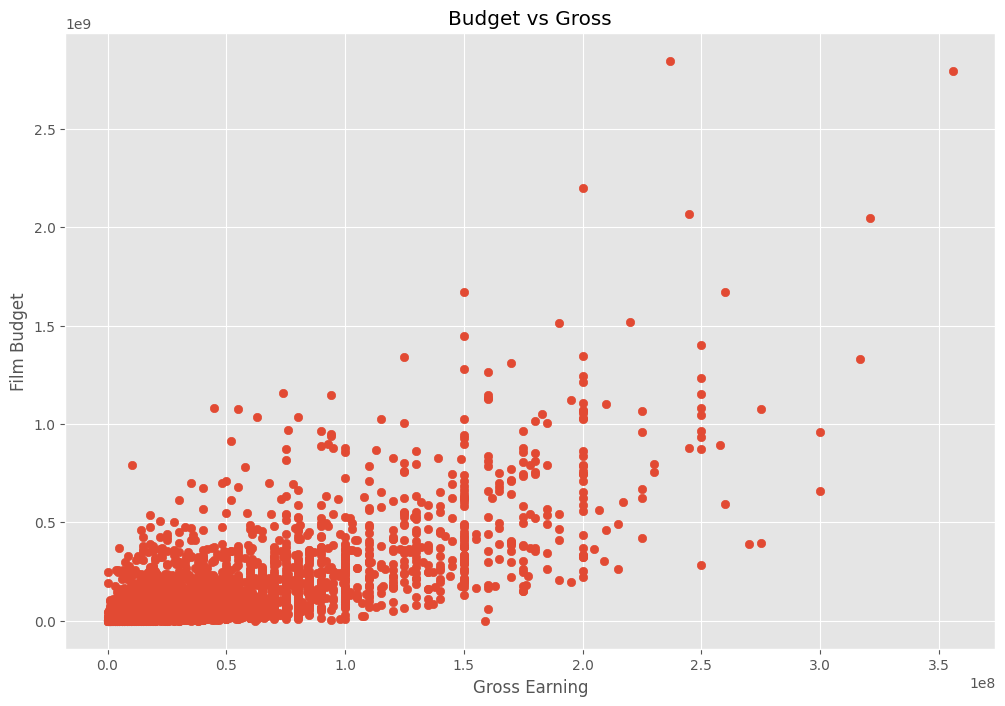

In [18]:
#Scatter plot with Rating vs Gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Gross Earning')
plt.ylabel('Film Budget')
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5434 entries, 5445 to 3203
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5434 non-null   object 
 1   rating    5422 non-null   object 
 2   genre     5434 non-null   object 
 3   year      5434 non-null   int64  
 4   score     5434 non-null   float64
 5   votes     5434 non-null   int64  
 6   director  5434 non-null   object 
 7   writer    5434 non-null   object 
 8   star      5434 non-null   object 
 9   country   5433 non-null   object 
 10  budget    5434 non-null   int64  
 11  gross     5434 non-null   int64  
 12  company   5434 non-null   object 
 13  runtime   5433 non-null   float64
dtypes: float64(2), int64(4), object(8)
memory usage: 636.8+ KB


<Axes: xlabel='budget', ylabel='gross'>

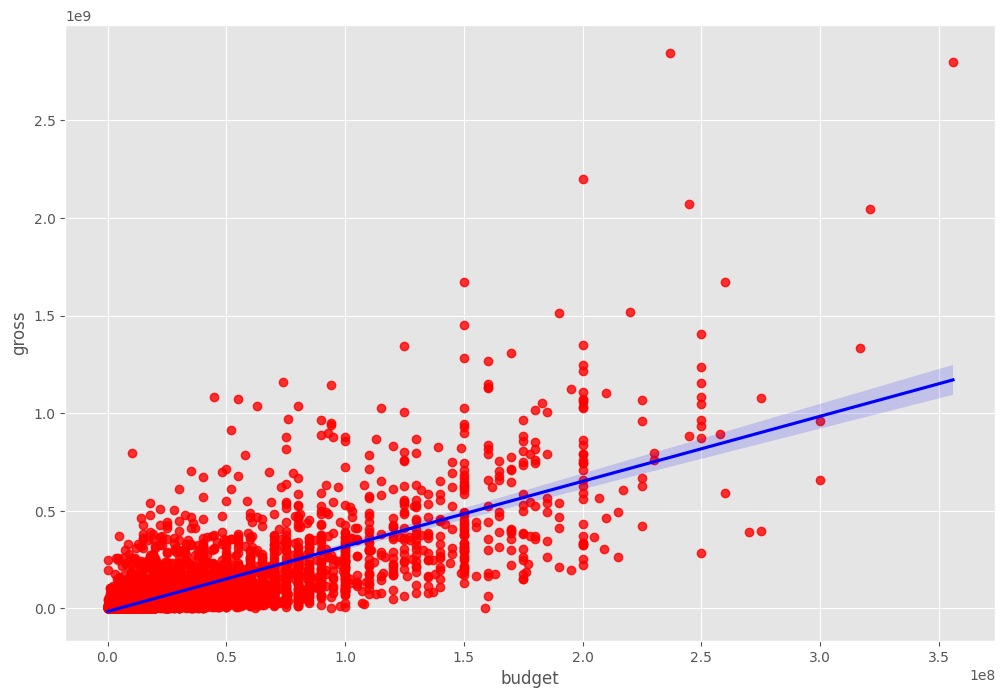

In [20]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [27]:
df.corr(numeric_only = True) # pearson, kendall,spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.054837,0.205524,0.327531,0.274101,0.074106
score,0.054837,1.000000,0.473738,0.071609,0.222034,0.414502
votes,0.205524,0.473738,1.000000,0.439925,0.614858,0.352408
budget,0.327531,0.071609,0.439925,1.000000,0.740364,0.318572
gross,0.274101,0.222034,0.614858,0.740364,1.000000,0.275562
runtime,0.074106,0.414502,0.352408,0.318572,0.275562,1.000000


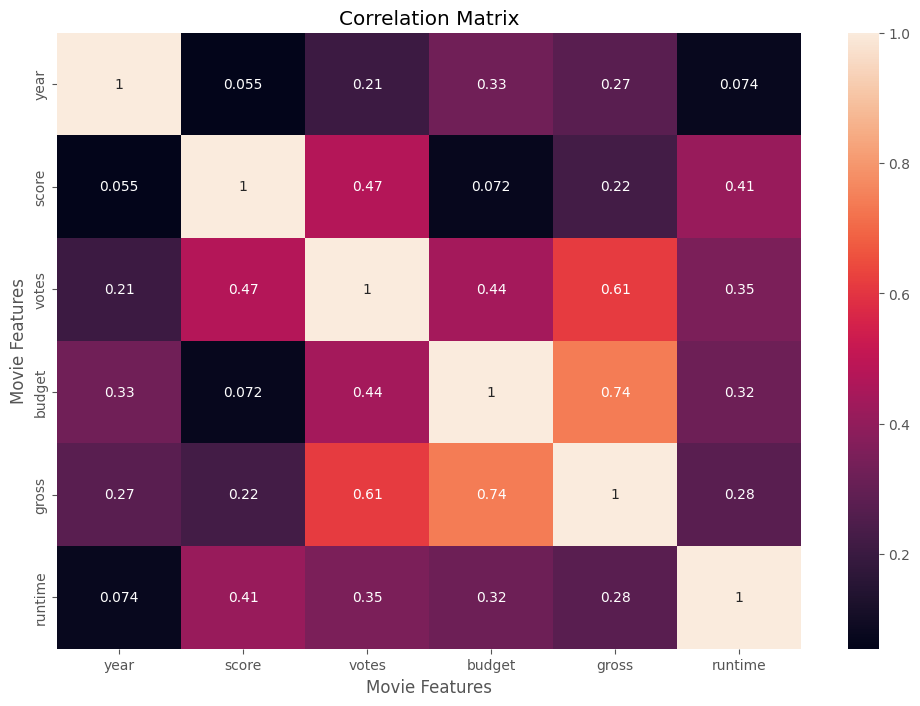

In [30]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [31]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [33]:
df_numerized = df 

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,387,5,0,2009,7.8,1100000,787,1264,1538,47,237000000,2847246203,1388,162.0
7445,389,5,0,2019,8.4,903000,106,514,1474,47,356000000,2797501328,987,181.0
3045,4921,5,6,1997,7.8,1100000,787,1264,1076,47,200000000,2201647264,1388,194.0
6663,3655,5,0,2015,7.8,876000,770,1809,357,47,245000000,2069521700,949,138.0
7244,390,5,0,2018,8.4,897000,106,514,1474,47,321000000,2048359754,987,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2980,5,0,1993,4.5,1900,1808,3111,187,47,5000000,2970,1382,97.0
3681,1599,3,6,2000,6.8,43000,954,1686,528,6,5000000,2554,468,108.0
272,2920,6,9,1982,3.9,2300,263,55,1477,47,800000,2270,584,85.0
2417,2400,-1,6,1993,7.3,5100,23,1219,1687,26,11900000,596,492,134.0


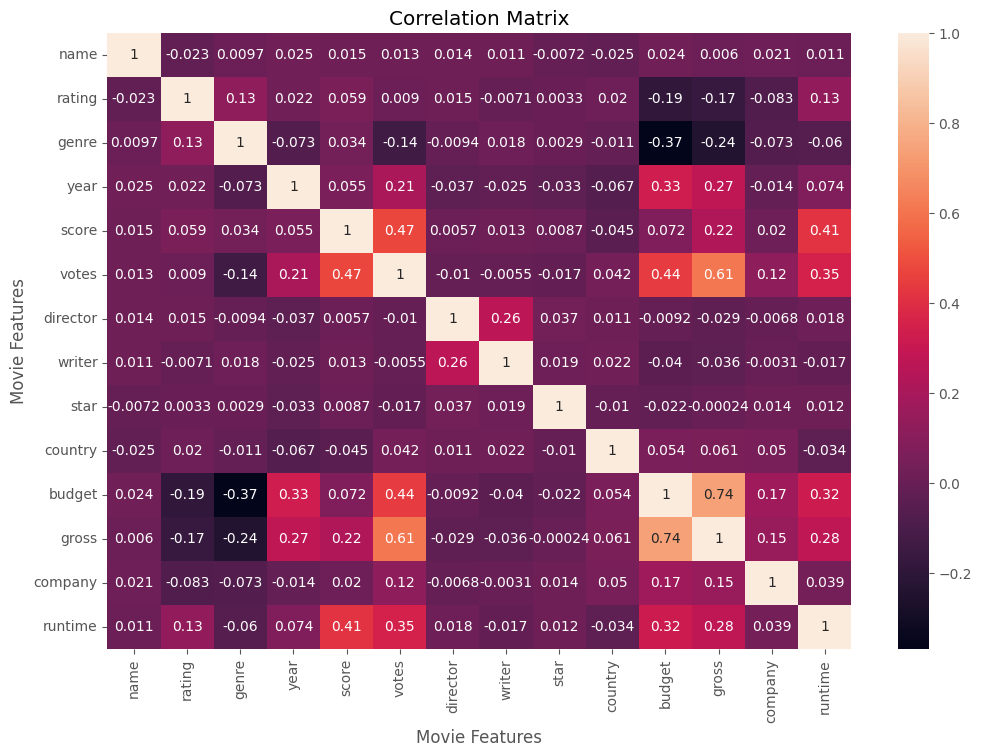

In [37]:
corr_matrix = df_numerized.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [38]:
df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.022979,0.009745,0.024553,0.014860,0.012937,0.013626,0.011365,-0.007201,-0.024571,0.023757,0.005985,0.021309,0.010700
rating,-0.022979,1.000000,0.128334,0.022076,0.059248,0.008995,0.015112,-0.007144,0.003259,0.020298,-0.187282,-0.169092,-0.083176,0.133146
genre,0.009745,0.128334,1.000000,-0.072875,0.034294,-0.136378,-0.009352,0.017818,0.002911,-0.010904,-0.368870,-0.244327,-0.073011,-0.060057
year,0.024553,0.022076,-0.072875,1.000000,0.054837,0.205524,-0.036608,-0.024763,-0.033350,-0.066507,0.327531,0.274101,-0.014205,0.074106
score,0.014860,0.059248,0.034294,0.054837,1.000000,0.473738,0.005687,0.012538,0.008717,-0.044600,0.071609,0.222034,0.020471,0.414502
votes,0.012937,0.008995,-0.136378,0.205524,0.473738,1.000000,-0.010076,-0.005515,-0.017405,0.042229,0.439925,0.614858,0.118987,0.352408
director,0.013626,0.015112,-0.009352,-0.036608,0.005687,-0.010076,1.000000,0.263047,0.036509,0.011034,-0.009188,-0.029264,-0.006849,0.018078
writer,0.011365,-0.007144,0.017818,-0.024763,0.012538,-0.005515,0.263047,1.000000,0.018873,0.022221,-0.039552,-0.036122,-0.003072,-0.016893
star,-0.007201,0.003259,0.002911,-0.033350,0.008717,-0.017405,0.036509,0.018873,1.000000,-0.009994,-0.021593,-0.000236,0.014213,0.012236
country,-0.024571,0.020298,-0.010904,-0.066507,-0.044600,0.042229,0.011034,0.022221,-0.009994,1.000000,0.054476,0.061002,0.049870,-0.033517


In [43]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()

pd.set_option('display.max_rows',None)

sorted_pairs = corr_pairs.sort_values()

In [44]:
high_corr =  sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes     gross       0.614858
gross     votes       0.614858
budget    gross       0.740364
gross     budget      0.740364
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

#### Votes and Budget have the highest correlation with gross earnings